In [10]:
import sys
import PIL
import os
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../')

from src.utils.create_transformer import create_transformer, Resize, Pad
from torchvision import transforms

plt.rcParams.update({'font.size': 22})

cocoapi_path = os.environ['HOME'] + '/programs/cocoapi/'

resize = Resize(224, resize_larger_edge=True)
pad = Pad(224)
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize((0.485, 0.456, 0.406),  # Normalize
                                 (0.229, 0.224, 0.225))
to_pil = transforms.ToPILImage()

cocoCaptionDF = pd.read_csv(cocoapi_path + 'annotations/coco_captions.csv')

%matplotlib inline

# Image Preprocessing

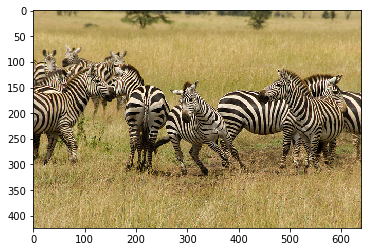

In [11]:
f = os.environ['HOME'] + '/Database/coco/images/val2017/000000185409.jpg'
im = PIL.Image.open(f).convert('RGB')
plt.imshow(im)
#narrator.gen_caption(f, as_string=True)

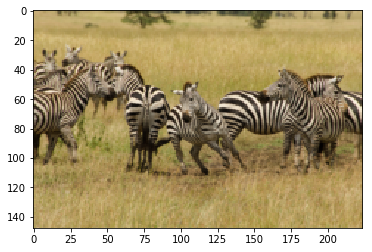

In [12]:
im = resize(im)
plt.imshow(im)

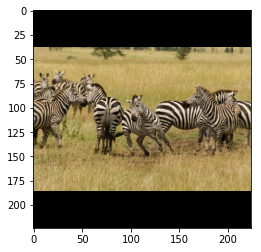

In [13]:
im = pad(im)
plt.imshow(im)

In [14]:
im = to_tensor(im)
print(im.size())

torch.Size([3, 224, 224])


In [15]:
im = normalize(im)

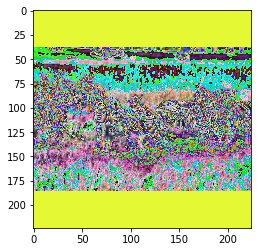

In [16]:
im = to_pil(im)
plt.imshow(im)

# Caption Distribution

## MSR-VTT

In [17]:
msrvtt = pd.read_csv('../data/processed/msrvtt_captions.csv')

In [18]:
cap_occurances = msrvtt['caption'].value_counts()

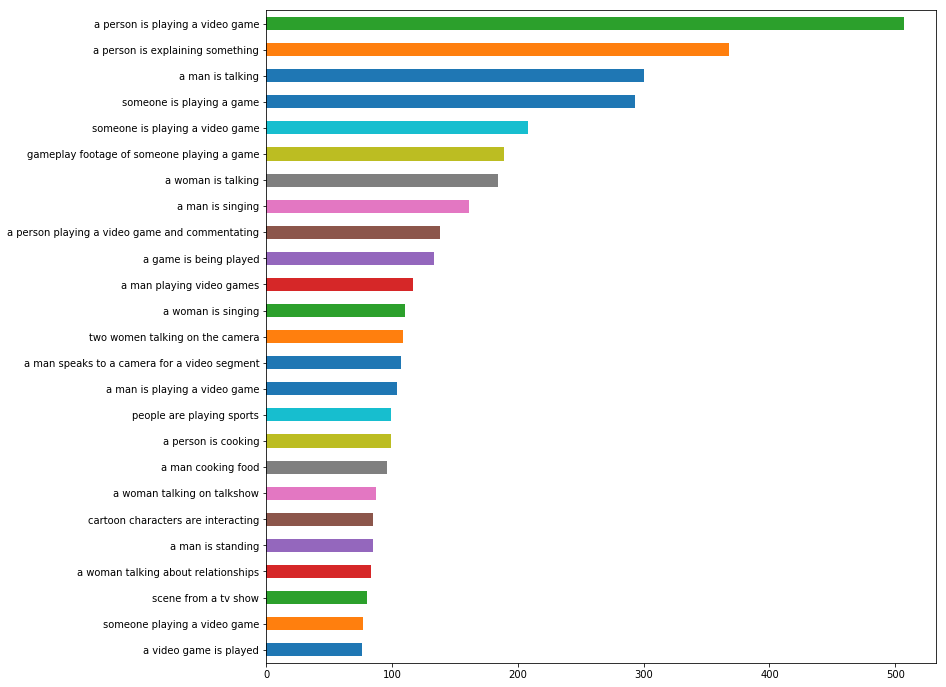

In [19]:
plt.figure(figsize=(12,12))
cap_occurances[cap_occurances > 50][::-1].tail(25).plot.barh()

## COCO

In [20]:
cocoCaptionDF = pd.read_csv(cocoapi_path + 'annotations/coco_captions.csv')

In [21]:
cap_occurances = cocoCaptionDF['caption'].value_counts()

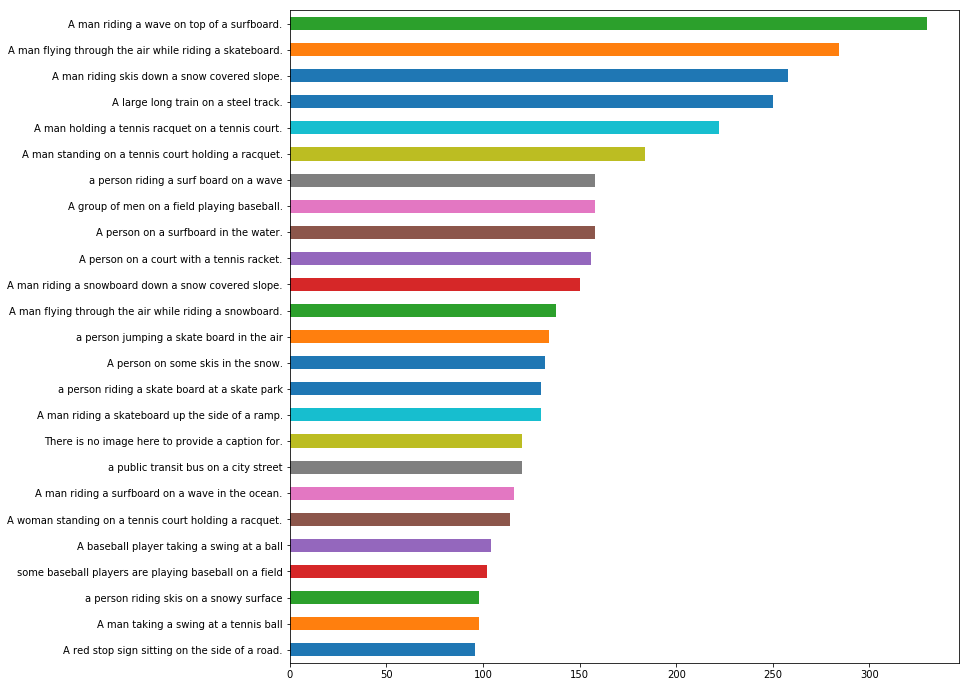

In [22]:
plt.figure(figsize=(12,12))
cap_occurances[cap_occurances > 50][::-1].tail(25).plot.barh()